# Quais padrões que determinam se um jogo tem sucesso?

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
    * [Primeiras conclusões](#data_review_conclusions)
* [Etapa 2. Pré-processamento de dados](#data_preprocessing)
    * [2.1 Duplicatas](#duplicates)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Conclusões intermediárias](#data_preprocessing_conclusions_intermediary)
    * [2.4 Conclusões](#data_preprocessing_conclusions)
* [Etapa 3. Transformações dos dados](#tranforamation_data)
* [Etapa 4. Categorização de dados](#categorization_data)
* [Etapa 5. EDA](#eda)
* [Etapa 6. Hipóteses](#hypothesys)
* [Conclusões](#end)

## Introdução <a id='intro'></a>

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas.

### Objetivo: 
Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.

Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
(O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.


### Etapas 
- `Os dados sobre o comportamento do usuário é armazenado no arquivo`  

/datasets/games.csv 

Primeiro, você avaliará a qualidade dos dados e ver se seus problemas são significativos. Depois, durante o pré-processamento de dados, você tentará dar conta dos problemas mais críticos problemas.
 
O seu projeto consistirá em quatro etapas:
 1. Visão geral dos dados
 2. Pré-processamento de dados
 3. Transformações dos dados
 4. Categorização de dados
 5. EDA
 6. Teste as hipóteses:
— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
Defina o valor do limiar *alfa** você mesmo.
Explique:
— Como você formula as hipóteses alternativas e nulas.
— Quais critérios você usou para testar as hipóteses, e por quê.
 
[Voltar ao Índice](#back)

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Abra os dados em Games e explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('C:/Users/gabri/Downloads/Corrigido/Projeto 5/games.csv')
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [3]:
# obtenha as 10 primeiras 10 linhas da tabela df
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# obtendo informações gerais sobre os dados em df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


O conjunto de dados contém os seguintes campos:

**Descrição dos dados**
- `Name` - (nome)
- `Platform` - (plataforma)
- `Year_of_Release` -  (Ano de lançamento)
- `Genre` - (gênero)
- `NA_sales` -  (vendas norte-americanas em milhões de USD)
- `EU_sales` - (vendas na Europa em milhões de USD)
- `JP_sales` -  (vendas no Japão em milhões de USD)
- `Other_sales` - (vendas em outros países em em milhões de USD)
- `Critic_Score` - (Pontuação crítica) (máximo de 100)
- `User_Score` - (Pontuação do usuário) (máximo de 10)
- `Classificação` -  (ESRB)

[Voltar ao Índice](#back)

### Primeiras conclusões <a id='data_review_conclusions'></a> 

Como podemos observar não existe algum erro sobre o estilo da colunas.
A quantidade de valores das colunas é diferente. Isso significa que os dados contém valores ausentes.

[Voltar ao Índice](#back)

## Etapa 2. Pré-processar dados <a id='data_preprocessing'></a>

### Duplicatas <a id='duplicates'></a>
Encontrando de duplicatas óbvias na tabela usando um comando:

In [5]:
# contando duplicatas claras
df.duplicated().sum()

0

### Valores ausentes <a id='missing_values'></a>
Há valores ausentes nas colunas 'Name' , 'Year_of_Release' , 'Critic_Score' , 'User_Score' e 'Rating' . Que afetam diretamente em nossa pesquisa. Vamos investigar mais anter de substituí-los por marcadores claros.

In [6]:
# Verificar Valores Ausentes
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
(df.isnull().sum() / df.shape[0]) * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

### Conclusões intermediárias <a id='data_preprocessing_conclusions_intermediary'></a>

Na coluna 'Critic_Score' podemos notar 50% dos dados sobre o nosso dataFrame estão faltantes, Esses dados estão faltantes porque eles ainda não foram avaliados e estão com a sigla 'tdb' na coluna 'User_Score' , já na colunas 'User_Score' e 'Rating' estão faltantes 40%, 'Year_of_Release' 1.5% e 'Name' 0.1%. '. Não há duplicatas mas o nome das colunas não estão de acordo com as regras da boa prática de estilo, pois isso, iremos renomear esses nomes e verificar se há dados inconsistentes.

[Voltar ao Índice](#back)

## Etapa 3. Transformação de dados <a id='tranforamation_data'></a>
Vamos examinar cada coluna para ver quais problemas podemos ter nelas.

In [8]:
global dataframes
dataframes = {
    'df': df
}

In [9]:
dicio_value_counts = {'Name','Platform','Year_of_Release','Genre','User_Score','Rating'}
lista_describe = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']

In [10]:
for df_name, df in dataframes.items():
    print(f"DataFrame: {df_name}")
    for column in dicio_value_counts:
        if column in df.columns:
            value_counts = df[column].value_counts(ascending=False,dropna=False)
            print(f"Coluna: {column}")
            print(value_counts)
            print('-------------------------------------------')

DataFrame: df
Coluna: User_Score
User_Score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 97, dtype: int64
-------------------------------------------
Coluna: Year_of_Release
Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: count, dtype: int64
-------------------------------------------
Coluna: Name
Name
Need for Speed: Most Wanted                 

In [11]:
for df_name, df in dataframes.items():
    print(f"DataFrame: {df_name}")
    print(df[lista_describe].describe())
    print('-------------------------------------------')

DataFrame: df
           NA_sales      EU_sales      JP_sales   Other_sales
count  16715.000000  16715.000000  16715.000000  16715.000000
mean       0.263377      0.145060      0.077617      0.047342
std        0.813604      0.503339      0.308853      0.186731
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.080000      0.020000      0.000000      0.010000
75%        0.240000      0.110000      0.040000      0.030000
max       41.360000     28.960000     10.220000     10.570000
-------------------------------------------


Não há valores deproporcionais, nessa questão está tudo coerente.

### Corrigindo nomes da colunas

In [12]:
# a lista dos nomes das colunas na tabela df
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [13]:
df.rename(columns=str.lower, inplace=True)

In [14]:
# a lista dos nomes das colunas na tabela df
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Nomes da colunas corrigido de acordo com as regras da boa prática de estilo.

### Preenchendo alguns valores ausentes

In [15]:
# preenchendo valores desconhecidos
df[['name','genre']] = df[['name','genre']].fillna('unknown')

In [16]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
def fill_tdb(row):
    if row['user_score'] ==  'tbd':
        return False  
    else:
        return row['user_score']

In [18]:
df['user_score'] = df.apply(fill_tdb, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Substituimos o valor de 'tdb' por False para que o valor fique nulo, sendo assim conseguirmos usar os dados para fazer a media de 'user_score' com base nas demais colunas.

[Voltar ao Índice](#back)


## Etapa 4. Categorização de dados <a id='categorization_data'></a>

### Criando coluna sales
Iremos criar a coluna 'sales' somando todas as vendas registrada nas demais regiões e categorizando em 'sales_pontuation' para usarmos os dados categorizados e substituir com a média os valores faltantes.

Categorização das vendas:
 - 30.00 'Excelent'
 - 20.00 'very good'
 - 10.00 'regular'
 - 5.00 'bad'
 - menor que 5.00 'terrible'
 
 tendo em vista o custo beneficio da mão de obra , equipamentos e criação do jogo.

In [21]:
df['sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [22]:
# função que classifica os valores totais de vendas para poder ser manipulada mais facilmente
def fill_sales_pontuation(row):
    if row['sales'] >=  30.00:
        return 'Excelent'
    if row['sales'] >=  20.00:
        return 'very good'
    if row['sales'] >=  10.00:
        return 'regular'
    if row['sales'] >=  5.00:
        return 'bad'
    if row['sales'] <  5.00:
        return 'terrible'

In [23]:
df['sales_pontuation'] = df.apply(fill_sales_pontuation, axis=1)

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_pontuation
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54,Excelent
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Excelent
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Excelent
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77,Excelent
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Excelent


Usaremos a média para substituir os valores faltantes, pois a médiana trás valores muito distantes do ideial e não havendo como preencher com a médiana na maioria dos casos.

utilizaremos para substituir os valores nas duas colunas:'user_score' e 'critic_score'

In [25]:
df['user_score'] = df['user_score'].astype('float')

In [26]:
df['user_score'] = df['user_score'].fillna(df.groupby(["platform","sales_pontuation","genre"])["user_score"].transform('mean'))
df['user_score'] = df['user_score'].fillna(df.groupby(["sales_pontuation"])["user_score"].transform('mean'))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16715 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  float64
 3   genre             16715 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        16715 non-null  float64
 10  rating            9949 non-null   object 
 11  sales             16715 non-null  float64
 12  sales_pontuation  16715 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


No caso de 'critic_score' usamos faria sequecias de preenchimento pois há valores muito especificos que não conseguimos preencher com determinada média.

In [28]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre","rating","user_score"])["critic_score"].transform('mean'))
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre","rating"])["critic_score"].transform('mean'))
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation","genre"])["critic_score"].transform('mean'))
df['critic_score'] = df['critic_score'].fillna(df.groupby(["platform","sales_pontuation"])["critic_score"].transform('mean'))
df['critic_score'] = df['critic_score'].fillna(df.groupby(["sales_pontuation"])["critic_score"].transform('mean'))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16715 non-null  object 
 1   platform          16715 non-null  object 
 2   year_of_release   16446 non-null  float64
 3   genre             16715 non-null  object 
 4   na_sales          16715 non-null  float64
 5   eu_sales          16715 non-null  float64
 6   jp_sales          16715 non-null  float64
 7   other_sales       16715 non-null  float64
 8   critic_score      16715 non-null  float64
 9   user_score        16715 non-null  float64
 10  rating            9949 non-null   object 
 11  sales             16715 non-null  float64
 12  sales_pontuation  16715 non-null  object 
dtypes: float64(8), object(5)
memory usage: 1.7+ MB


No caso de 'rating' não iremos preencher pois essa avaliação é feita manualmente jogo a jogo.

Colunas devidamente preenchidas, iremos fazer a analise dos nossos dados.

[Voltar ao Índice](#back)

## Etapa 5. EDA <a id='eda'></a>

### Quantos jogos foram lançados em anos diferentes. Os dados de cada período são significativos?

In [30]:
df['year_of_release'].value_counts()

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: count, dtype: int64

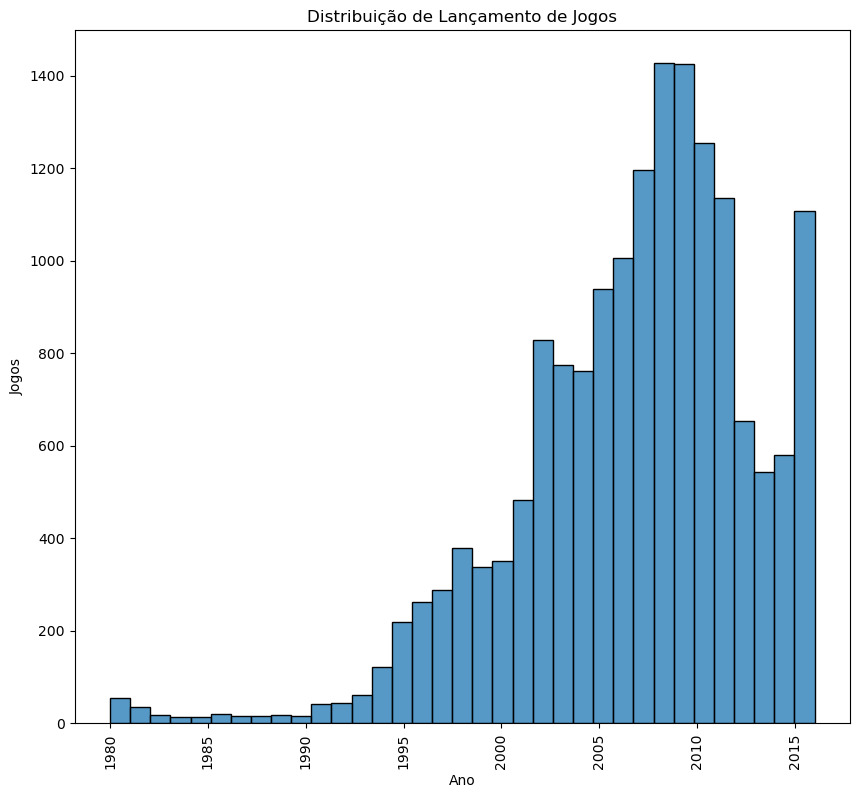

In [31]:
plt.figure(figsize=(10, 9));
ax = sns.histplot(data=df, x='year_of_release', bins=35, kde=False);
mean_line = np.mean(df['year_of_release'].value_counts());
plt.title('Distribuição de Lançamento de Jogos');
plt.xlabel('Ano');
plt.ylabel('Jogos');
plt.xticks(rotation=90);


Podemos ver um grande crescimento a partir dos anos dos 1994, com a era da tecnologia os consoles foram se popularizando.E o decaimento em 2010 com ascenção do mercado dos mobile.

### Como as vendas variaram de plataforma para plataforma? Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. 

In [32]:
# Plataformas com as maiores vendas 
df.groupby('platform')['sales'].sum().sort_values(ascending=False).head(2)

platform
PS2     1255.77
X360     971.42
Name: sales, dtype: float64

In [33]:
df_PS2 = df.query("platform == 'PS2'")

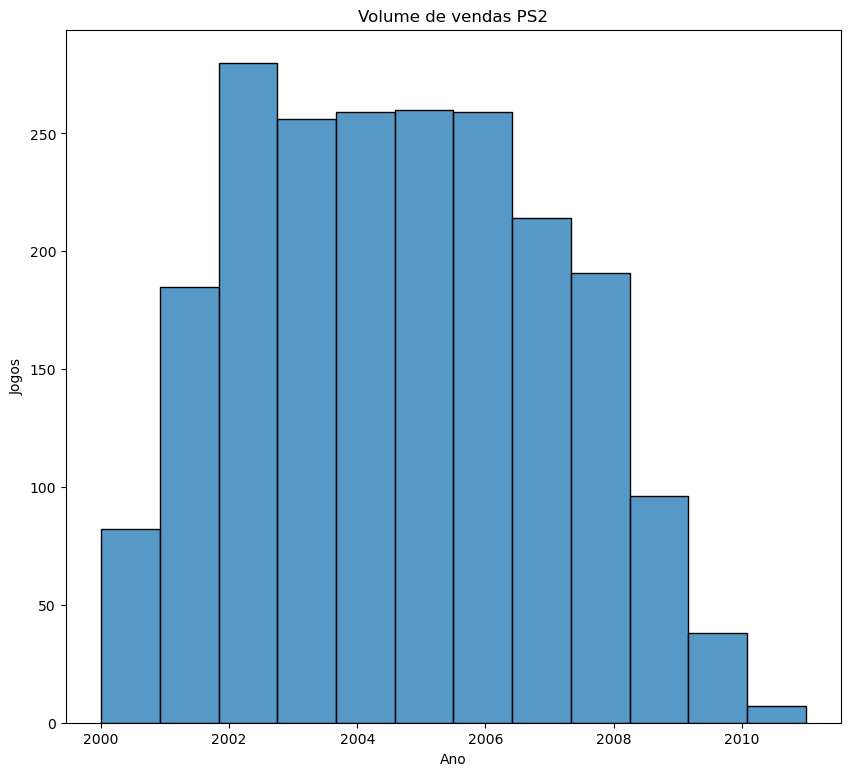

In [34]:
plt.figure(figsize=(10, 9))
sns.histplot(data=df_PS2, x='year_of_release', bins=12, kde=False)
plt.title('Volume de vendas PS2')
plt.xlabel('Ano')
plt.ylabel('Jogos')
plt.show()

Ao analisarmos, vemos grande volume de vendas a partir do lançamento em 2000 e decaimento em 2007.

In [35]:
df_X360 = df.query("platform == 'X360'")

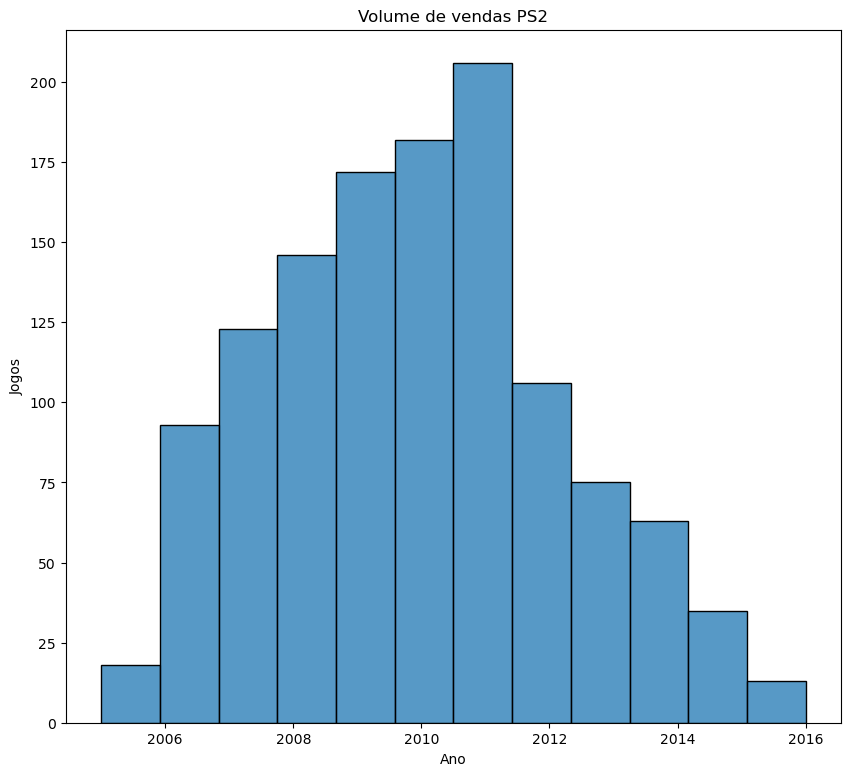

In [36]:
plt.figure(figsize=(10, 9))
sns.histplot(data=df_X360, x='year_of_release', bins=12, kde=False)
plt.title('Volume de vendas PS2')
plt.xlabel('Ano')
plt.ylabel('Jogos')
plt.show()

Ao analisarmos vemos grande volume de vendas a partir do lançamento em 2006 com o pico em 2011 e decaimento em 2012.

### Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [37]:
df_plataform = df.pivot_table(index=['platform','year_of_release'], values='sales', aggfunc='count').reset_index()
df_plataform_count = df_plataform.groupby('platform')['year_of_release'].count()

In [38]:
df_plataform_count

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64

In [39]:
def calculate_stats(dataframe):
    variance = dataframe.var()
    std_deviation = dataframe.std()
    mean = dataframe.mean()
    return variance, std_deviation, mean

# Para usar a função
variance, std_deviation, mean = calculate_stats(df_plataform_count)

In [40]:
print("Variância:\n", variance)
print("\nDesvio Padrão:\n", std_deviation)
print("\nMédia:\n", mean)

Variância:
 25.82580645161291

Desvio Padrão:
 5.081909724858649

Média:
 7.67741935483871


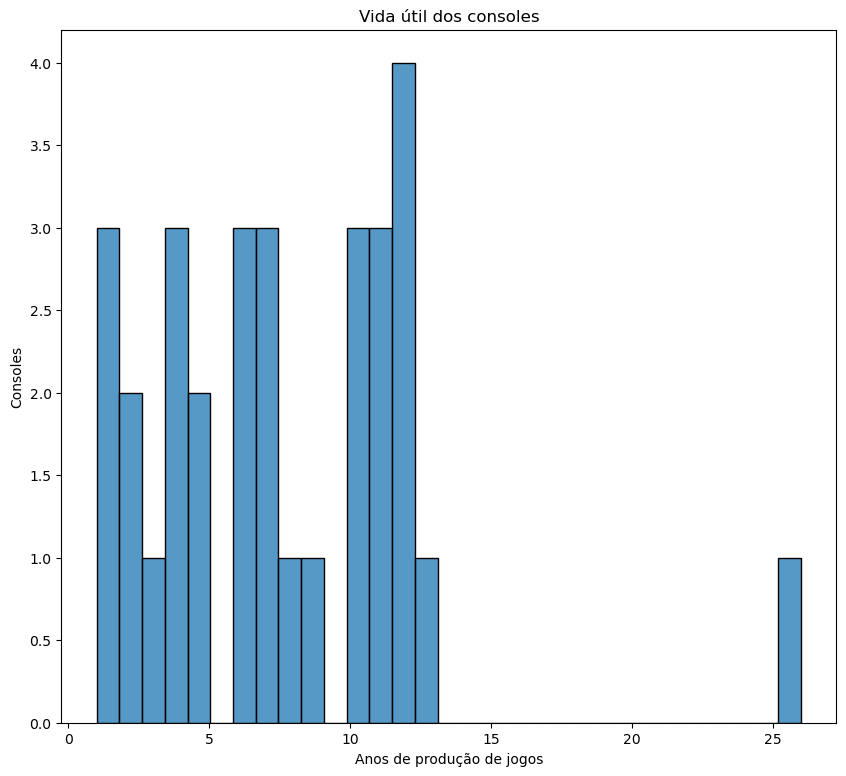

In [41]:
plt.figure(figsize=(10, 9))
sns.histplot(data=df_plataform_count, bins=31, kde=False)
plt.title('Vida útil dos consoles')
plt.xlabel('Anos de produção de jogos')
plt.ylabel('Consoles')
plt.show()

A duração média das plataformas é de aproximadamente 7 anos e meio.

Abaixo podemos ver a quantidade de vendas de jogos desenvolvidos para as plataformas, começando de 2010 até 2016.

In [42]:
for year in range(2010, 2017):
    df_seven_years = df[df['year_of_release'] == year]
    df_seven_years = df_seven_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
    print(df_seven_years)
    print("-------------------------------")

platform
X360    170.03
PS3     142.17
Wii     127.95
DS       85.02
PSP      35.04
PC       24.28
PS2       5.64
Name: sales, dtype: float64
-------------------------------
platform
PS3     156.78
X360    143.84
3DS      63.20
Wii      59.65
PC       35.03
DS       26.18
PSP      17.82
PSV       4.63
PS2       0.45
Name: sales, dtype: float64
-------------------------------
platform
PS3     107.36
X360     99.74
3DS      51.36
PC       23.22
Wii      21.71
WiiU     17.56
PSV      16.19
DS       11.01
PSP       7.69
Name: sales, dtype: float64
-------------------------------
platform
PS3     113.25
X360     88.58
3DS      56.57
PS4      25.99
WiiU     21.65
XOne     18.96
PC       12.38
PSV      10.59
Wii       8.59
PSP       3.14
DS        1.54
Name: sales, dtype: float64
-------------------------------
platform
PS4     100.00
XOne     54.07
PS3      47.76
3DS      43.76
X360     34.74
WiiU     22.03
PC       13.28
PSV      11.90
Wii       3.75
PSP       0.24
Name: sales, dtype: float

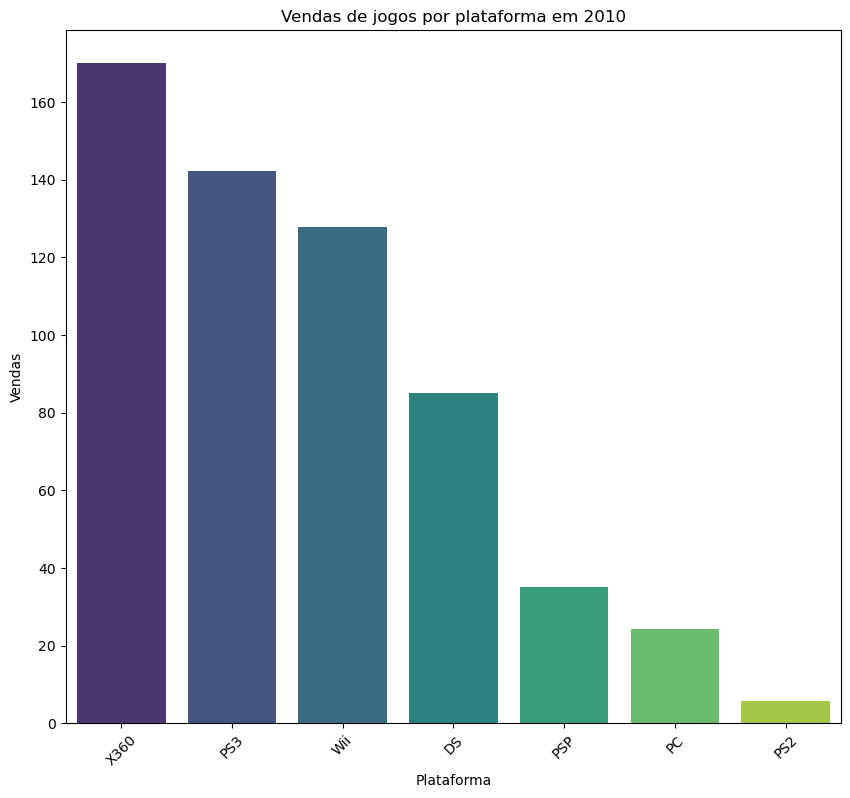

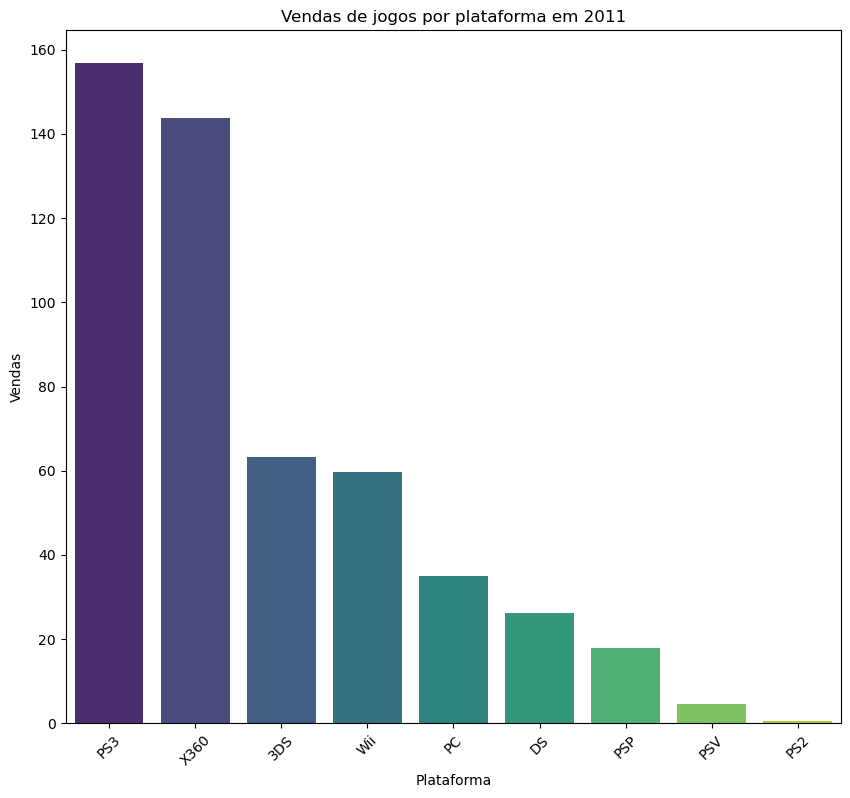

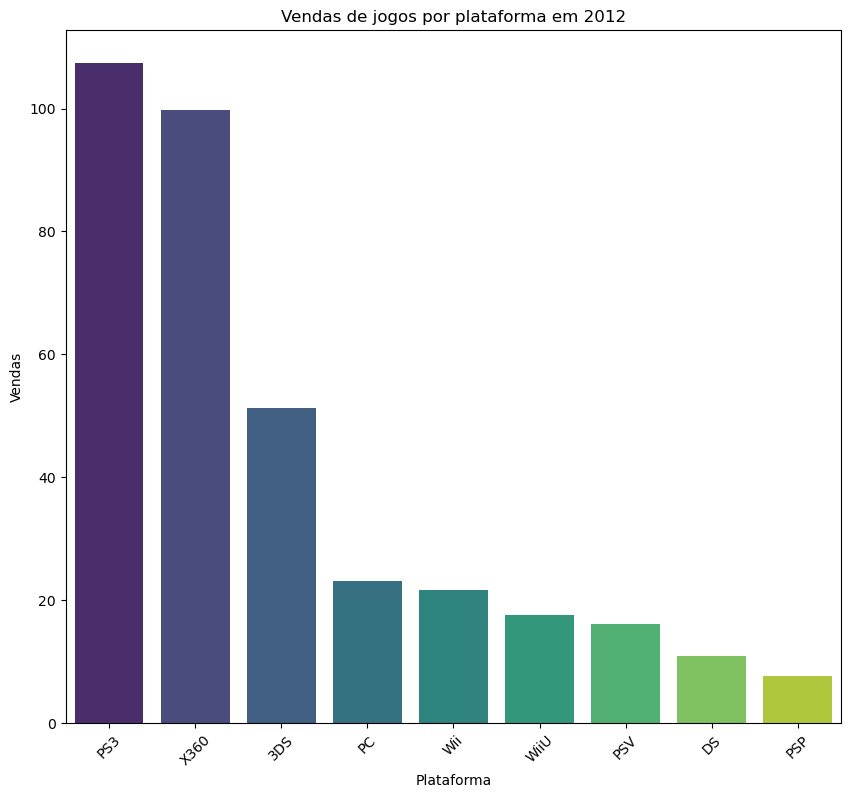

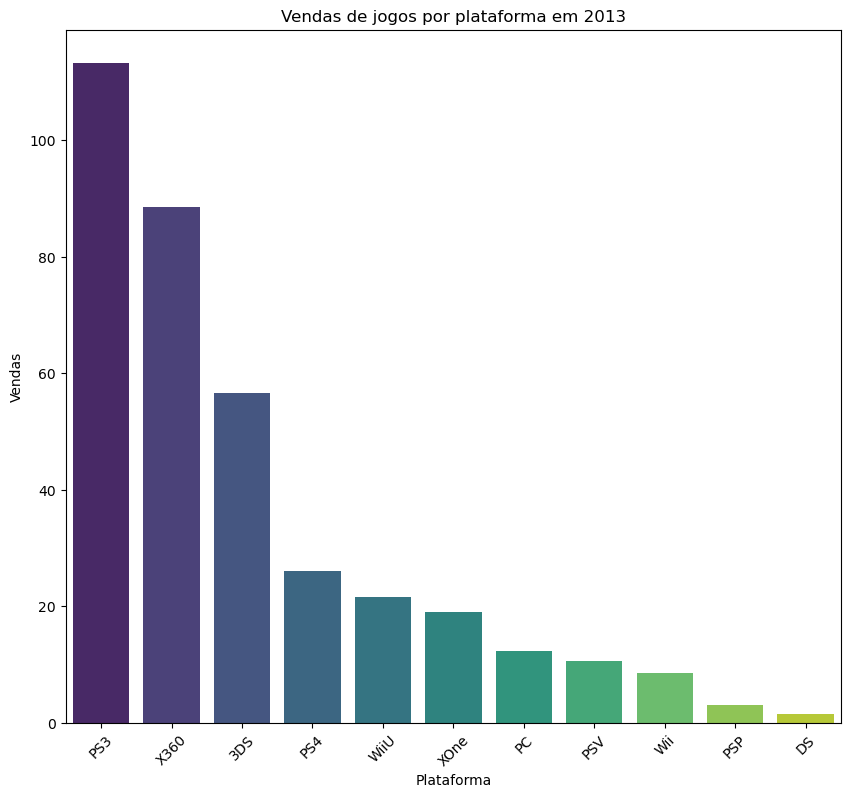

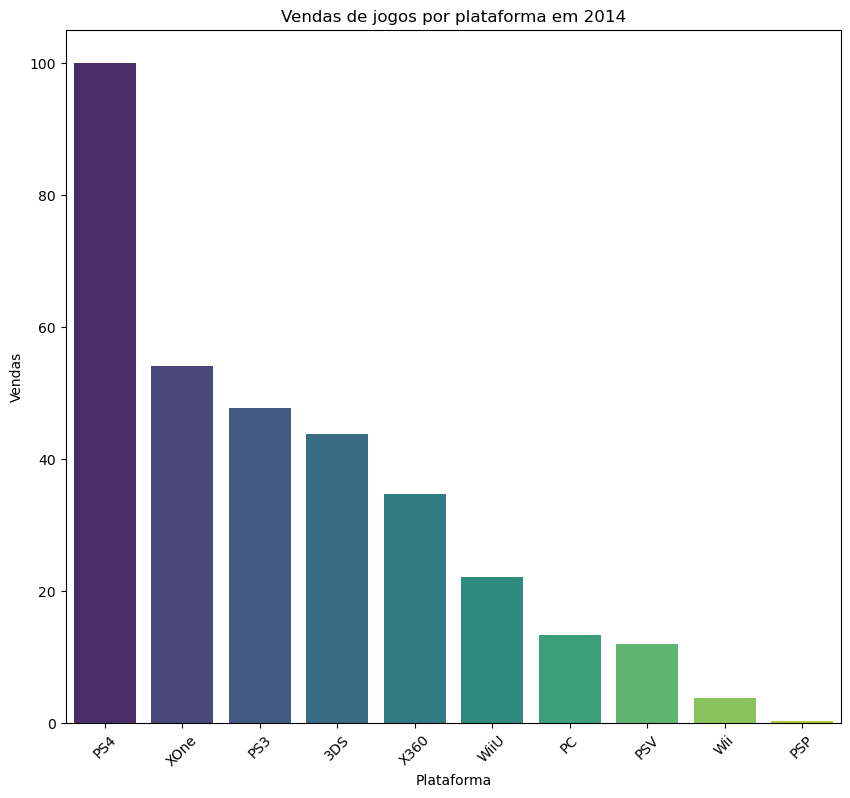

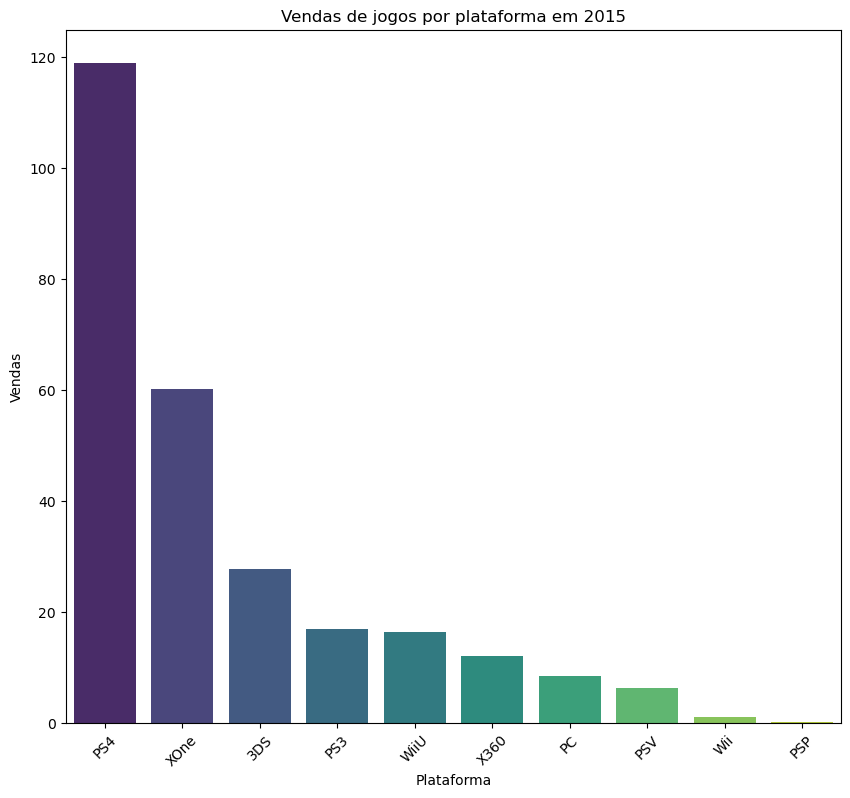

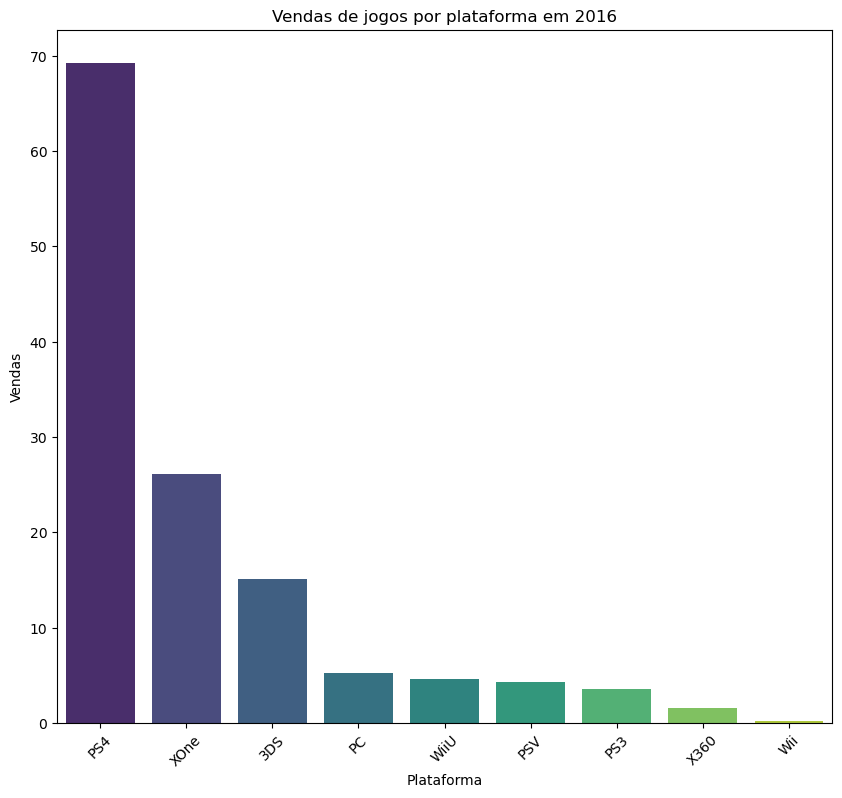

In [96]:
for year in range(2010, 2017):
    df_seven_years = df[df['year_of_release'] == year]
    df_seven_years = df_seven_years.groupby('platform')['sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 9))
    sns.barplot(x=df_seven_years.index, y=df_seven_years.values, palette="viridis")
    plt.title(f'Vendas de jogos por plataforma em {year}')
    plt.xlabel('Plataforma')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45)
    plt.show()

A análise revela que as plataformas potencialmente lucrativas incluem o PS4 e o XONE, ambos com 3 anos desde o lançamento, o PC, que se mantém no mercado há 26 anos, e o 3DS, que está no seu último ano. Por outro lado, o WiiU tem 4 anos desde o lançamento.

Já os consoles PSV, PS3, X360 e Wii estão se aproximando do fim de seu ciclo de vida. Em contrapartida, X360, PS3, DS, PSP e PS2, embora tenham sido populares no passado, atualmente não apresentam vendas significativas.

### Vendas globais de todos os jogos, divididos pelas principais plataformas.


Abaxo vemos os jogos desde 2010, visando os 7 anos em média de vida de vendas de um console.

In [44]:
df_fil = df.query("platform == 'PS4' or platform == 'XOne'or platform == 'WiiU' or platform == 'PC'")
df_fil = df_fil.query("year_of_release >= 2010")
dfplat = df_fil.pivot_table(index=['name','platform'], values='sales', aggfunc='sum').reset_index()

<Axes: xlabel='platform', ylabel='sales'>

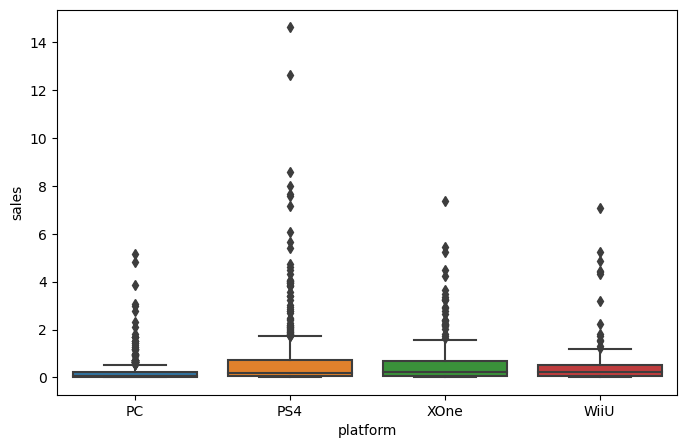

In [45]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(x='platform', y='sales', data=dfplat, ax=ax)

In [46]:
dfplat_mean = df_fil.pivot_table(index=['platform'], values='sales', aggfunc='mean').sort_values(by='sales',ascending=False)
dfplat_mean

,sales
platform,
PS4,0.801378
XOne,0.645020
WiiU,0.559116
PC,0.254614


Com base em nossas pesquisas, constatamos que as plataformas mais vantajosas para o desenvolvimento de jogos são o PS4, XOne, WiiU e PC. As disparidades nas vendas entre elas são significativas:

- PS4: 0.801378 milhões
- XOne: 0.645020 milhões
- WiiU: 0.559116 milhões
- PC: 0.254614 milhões

### Como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular? Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

In [62]:
df_PS4 = df.query("platform == 'PS4'")
df_PS4.drop('platform', axis=1, inplace=True)

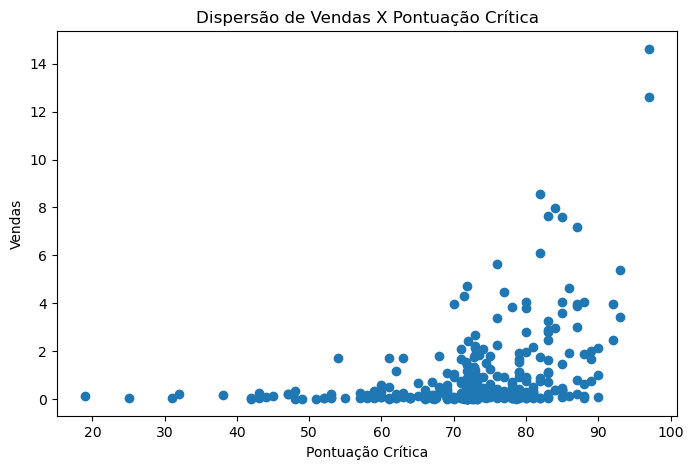

In [63]:
plt.figure(figsize=(8, 5))
plt.scatter(df_PS4['critic_score'], df_PS4['sales'])
plt.title('Dispersão de Vendas X Pontuação Crítica')
plt.xlabel('Pontuação Crítica')
plt.ylabel('Vendas')
plt.show()

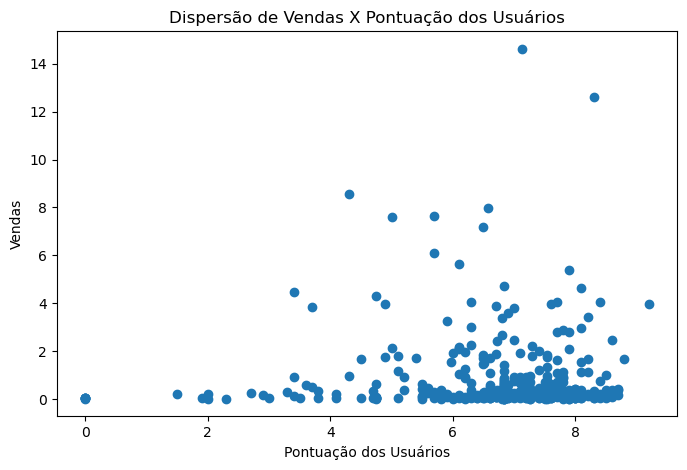

In [64]:
plt.figure(figsize=(8, 5))
plt.scatter(df_PS4['user_score'], df_PS4['sales'])
plt.title('Dispersão de Vendas X Pontuação dos Usuários')
plt.xlabel('Pontuação dos Usuários')
plt.ylabel('Vendas')
plt.show()

In [65]:
df_PS4['sales'].corr(df_PS4['user_score'])

0.0022881116101665967

In [66]:
df_PS4['sales'].corr(df_PS4['critic_score'])

0.3936750556021807

Podemos analizar que a Pontuação crítica influencia nas vendas dos jogos, já a pontuação do usuário bem pouco, pois é questão de preferência.


### Compare as vendas dos mesmos jogos em outras plataformas.

In [76]:
games_plat = df_fil.pivot_table(index=['name'], values='platform', aggfunc='count').reset_index().sort_values(by='platform',ascending=False)
games_plat_dif = games_plat[games_plat['platform']>3] 
name = games_plat_dif['name'].unique()

In [77]:
def listaFiltro(dataframe, valores):
    return dataframe.loc[dataframe['name'].isin(valores)]

In [78]:
df_games = listaFiltro(df_fil, name)
df_games = df_games.sort_values(by='name')

In [79]:
df_games_equal = df_games[['name','platform','sales']]

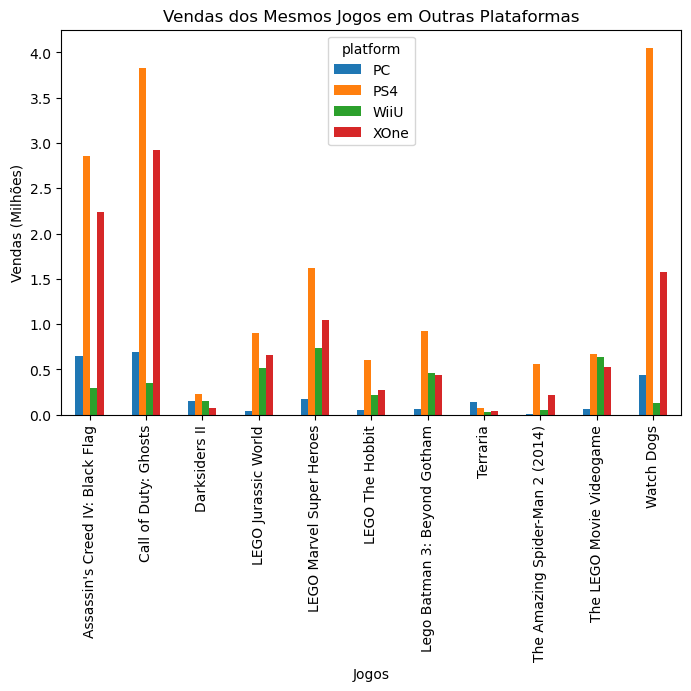

In [82]:
# Criação da tabela pivot e plotagem do gráfico de barras
pivot_table = df_games_equal.pivot_table(index='name', columns='platform', values='sales', aggfunc='sum')
ax = pivot_table.plot(kind='bar', figsize=(8, 5))

# Adição de título e rótulos aos eixos
ax.set_title('Vendas dos Mesmos Jogos em Outras Plataformas')
ax.set_xlabel('Jogos')
ax.set_ylabel('Vendas (Milhões)')

# Exibição do gráfico
plt.show()

Transformamos em array os jogos e comparamos as vendas dos mesmos jogos em outras plataformas

###  O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

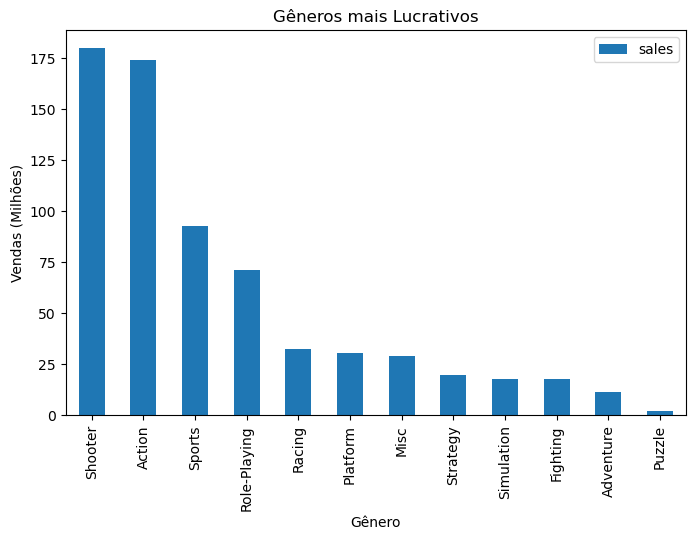

In [88]:
# Criação da tabela pivot e plotagem do gráfico de barras
df_gen = df_fil.pivot_table(index='genre', values='sales', aggfunc='sum').reset_index().sort_values(by='sales', ascending=False)
ax = df_gen.plot(kind='bar', x='genre', y='sales', figsize=(8, 5))

# Adição de título e rótulos aos eixos
ax.set_title('Gêneros mais Lucrativos')
ax.set_xlabel('Gênero')
ax.set_ylabel('Vendas (Milhões)')

# Exibição do gráfico
plt.show()

O Gênero de jogos de tiro é o mais famoso, seguido de jogos Ação e Esportes.

Já os jogos de luta, aventura e quebra-cabeça estão entre os menos atrativos.

### Criar um perfil de usuário para cada região

#### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

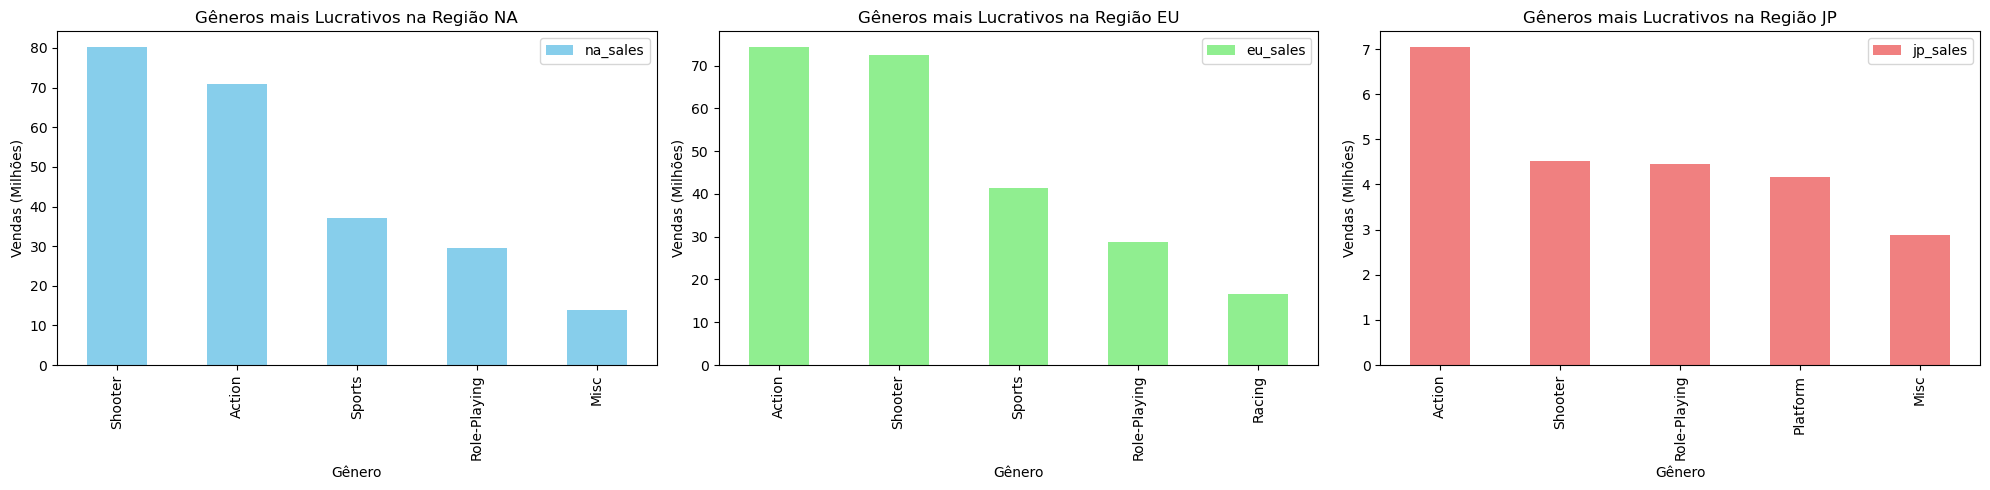

In [91]:
# Criação e plotagem dos gráficos para as regiões NA, EU e JP lado a lado
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Gráfico para a região NA
df_na = df_fil.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
ax1 = df_na.plot(kind='bar', x='genre', y='na_sales', ax=axes[0], color='skyblue')
ax1.set_title('Gêneros mais Lucrativos na Região NA')
ax1.set_xlabel('Gênero')
ax1.set_ylabel('Vendas (Milhões)')

# Gráfico para a região EU
df_eu = df_fil.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
ax2 = df_eu.plot(kind='bar', x='genre', y='eu_sales', ax=axes[1], color='lightgreen')
ax2.set_title('Gêneros mais Lucrativos na Região EU')
ax2.set_xlabel('Gênero')
ax2.set_ylabel('Vendas (Milhões)')

# Gráfico para a região JP
df_jp = df_fil.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)
ax3 = df_jp.plot(kind='bar', x='genre', y='jp_sales', ax=axes[2], color='lightcoral')
ax3.set_title('Gêneros mais Lucrativos na Região JP')
ax3.set_xlabel('Gênero')
ax3.set_ylabel('Vendas (Milhões)')

plt.tight_layout()
plt.show()

As discrepâncias entre os cinco principais gêneros em cada região são mínimas, sugerindo uma semelhança significativa. Notavelmente, na região JP, os jogos de esportes não desfrutam de grande popularidade.

### As classificações do ESRB afetam as vendas em regiões individuais ?

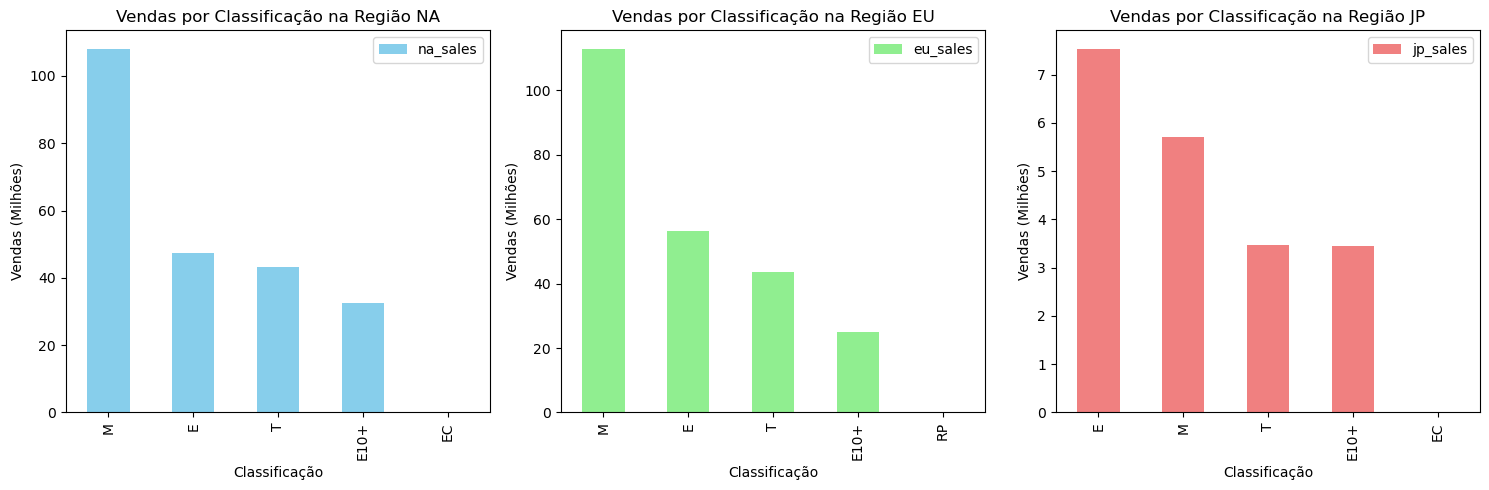

In [97]:
# Criação e plotagem dos gráficos para as vendas por classificação em cada região lado a lado
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Gráfico para a região NA
df_na_rating = df_fil.pivot_table(index=['rating'], values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head(5)
ax1 = df_na_rating.plot(kind='bar', x='rating', y='na_sales', ax=axes[0], figsize=(15, 5), color='skyblue')
ax1.set_title('Vendas por Classificação na Região NA')
ax1.set_xlabel('Classificação')
ax1.set_ylabel('Vendas (Milhões)')

# Gráfico para a região EU
df_eu_rating = df_fil.pivot_table(index=['rating'], values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head(5)
ax2 = df_eu_rating.plot(kind='bar', x='rating', y='eu_sales', ax=axes[1], figsize=(15, 5), color='lightgreen')
ax2.set_title('Vendas por Classificação na Região EU')
ax2.set_xlabel('Classificação')
ax2.set_ylabel('Vendas (Milhões)')

# Gráfico para a região JP
df_jp_rating = df_fil.pivot_table(index=['rating'], values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head(5)
ax3 = df_jp_rating.plot(kind='bar', x='rating', y='jp_sales', ax=axes[2], figsize=(15, 5), color='lightcoral')
ax3.set_title('Vendas por Classificação na Região JP')
ax3.set_xlabel('Classificação')
ax3.set_ylabel('Vendas (Milhões)')

plt.tight_layout()
plt.show()

Evidentemente, as classificações exercem influência significativa sobre as vendas, com a classificação "M" (Mature - Maiores de 17 anos) destacando-se nas regiões da América do Norte e Europa. Por outro lado, na região do Japão, a classificação mais popular é "E" (Everyone - Maiores de 6 anos ou livre).

[Voltar ao Índice](#back)

## Etapa 6. Hipóteses <a id='hypothesys'></a>

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?

In [104]:
from scipy import stats as st

In [105]:
alpha = 0.05

In [106]:
df_xone = df_fil.query("platform == 'XOne'")
df_pc = df_fil.query("platform == 'PC'")

In [107]:
results_plat = st.ttest_ind(df_xone['user_score'], df_pc['user_score'],equal_var = False)

In [108]:
print('p-value:', results_plat.pvalue)

p-value: 0.6602470416870396


In [109]:
if results_plat.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós não podemos rejeitar a hipótese nula


O valor-p indica que, embora as médias das classificações dos usuários nas plataformas Xbox One e PC sejam distintas, existe uma probabilidade de 60% de se obter aleatoriamente uma diferença dessa magnitude ou maior. Essa probabilidade não é suficiente para concluir que existe uma diferença significativa entre as médias das classificações.

### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?

In [110]:
df_action = df_fil.query("genre == 'Action'")
df_sports = df_fil.query("genre == 'Sports'")

In [111]:
results_gen = st.ttest_ind(df_action['user_score'], df_sports['user_score'],equal_var = False)

In [112]:
print('p-value:', results_gen.pvalue)

p-value: 3.616543702770749e-09


In [113]:
if results_gen.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula") 

Nós rejeitamos a hipótese nula


O valor-p indica que as médias das classificações dos usuários para os gêneros Action (ação) e Sports (esportes) são estatisticamente diferentes.

[Voltar ao Índice](#back)

## Conclusão geral <a id='end'></a>

Neste projeto, foram importadas bibliotecas como "pandas" e "numpy", que são comumente utilizadas, além de "matplotlib" e "seaborn" para a visualização aprimorada dos dados. 

Com base em análises prévias, os dados foram pré-processados, incluindo a padronização de estilos em cada coluna, correção de valores inconsistentes, preenchimento de valores ausentes com base em estudos de outras colunas, identificação e tratamento de duplicatas. A análise exploratória revelou que as plataformas têm uma vida útil média de 7 anos, com PS4/XOne/WiiU/PC sendo as mais promissoras. 

Foi observado que a pontuação crítica influencia nas vendas dos jogos, enquanto a avaliação não tem tanto impacto, variando de acordo com a plataforma. O PS4 foi identificado como a plataforma mais lucrativa devido à sua popularidade, seguido pelo PC devido à sua durabilidade. As classificações foram constatadas como influenciadoras das vendas, com a classificação "M" (Maiores de 17 anos) se destacando nas regiões de NA e EU, e a classificação "E" (Maiores de 6 anos ou livre) sendo a mais popular na região JP. 

Quanto às hipóteses levantadas, não foi possível afirmar que as médias dos usuários das plataformas Xbox One e PC são iguais. No entanto, foi constatado que as médias das classificações dos usuários para os gêneros Action (ação) e Sports (esportes) são estatisticamente diferentes.

[Voltar ao Índice](#back)
